# Assignment 2 - Intelligent Machines, Ethics and Law (COMP2400/6400)

### Name: Angus Ng Yu Fung

### Student Id: 47424265

# Credit Risk Classification

In this assignment, you will implement a **credit risk classification system** as an illustration of *algorithmic decision making*. You will  use Python for implementation, and explore its social implications. This assessment is designed to familiarize you with the process of training a classification model, implementing it using a Python program; and critically examine it from a societal perspective. This assignment will be marked out of 100, and will count towards **40%** of the total unit assessment.

## Credit Risk Dataset Description

The Credit Risk dataset being provided is based on a synthetic dataset publicly available on [Kaggle](https://www.kaggle.com/). It includes various financial attributes to evaluate credit risk. It features 32,581 samples with 11 variables. The key attributes include borrowers' age, employment status, education level, annual income, loan amount, and interest rate. The dataset aims to facilitate the prediction of credit default, that is failure on part of the loan applicant (borrower) to make the loan repayments.

## Setup

In [1]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [3]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


In [4]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


## Task 0 - (0 Marks)

Load the dataset using Python. 

Preprocess the dataset. 			

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

# Load the dataset
df=pd.read_csv('credit_risk_dataset_v3.csv')

# Show first few rows of the dataset
print (df.head())


# Size of the datset 
print ('Size of the dataset:', df.shape)
print ('===============================')

# Check if data has null values
print ('null information:')
print ('variable \t number of null values')
print (df.isnull().sum())

# remove null data points from the dataset
# axis = 0 means drop rows which contain missing values.
df = df.dropna(axis=0)
print ('===============================')
print ('Null rows removed. \n')

# Check if data has null values
print ('Updated null information:')
print ('variable \t number of null values')
print (df.isnull().sum())
print ('===============================')
print ('Updated size of the dataset:', df.shape)

   person_age  person_income person_home_ownership  person_emp_length  \
0          22          59000                  RENT              123.0   
1          21           9600                   OWN                5.0   
2          25           9600              MORTGAGE                1.0   
3          23          65500                  RENT                4.0   
4          24          54400                  RENT                8.0   

  loan_intent  loan_amnt  loan_int_rate  loan_status  loan_percent_income  \
0    PERSONAL      35000          16.02            1                 0.59   
1   EDUCATION       1000          11.14            0                 0.10   
2     MEDICAL       5500          12.87            1                 0.57   
3     MEDICAL      35000          15.23            1                 0.53   
4     MEDICAL      35000          14.27            1                 0.55   

  cb_person_default_on_file  cb_person_cred_hist_length  
0                         Y             

loan_intent
EDUCATION            5704
MEDICAL              5293
VENTURE              5001
PERSONAL             4877
DEBTCONSOLIDATION    4565
HOMEIMPROVEMENT      3198
Name: count, dtype: int64


<Axes: xlabel='loan_intent'>

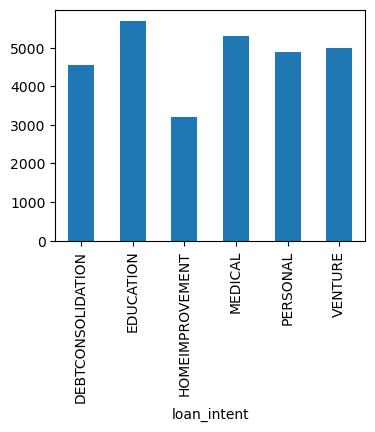

In [7]:
# Show distribution of the categorical variable 'loan_intent'
print (df['loan_intent'].value_counts())

# Visualize the information
GroupedData=df.groupby('loan_intent').size()
GroupedData.plot(kind='bar', figsize=(4,3))

person_income
60000     924
30000     729
50000     677
40000     585
45000     535
         ... 
99200       1
99473       1
47230       1
99670       1
720000      1
Name: count, Length: 3835, dtype: int64


<Axes: >

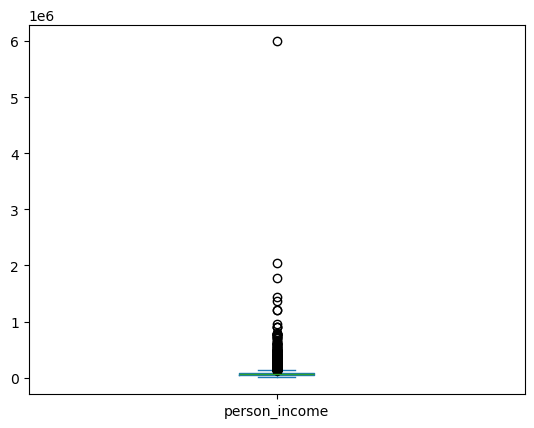

In [8]:
# Show distribution of the numerical variable 'person_income'
print (df['person_income'].value_counts())

# Visualize the information
# A box plot is a method for graphically depicting groups of numerical data through their quartiles.
df['person_income'].plot.box()


In [9]:
# From the visualization, we notice that 'person_income' has skewness, and log transform can fix the skewness.
df['person_income'] = np.log(df['person_income'])

In [10]:
# Some variables, such as 'person_home_ownership' and 'loan_intent', are categorical.
# Others, such as 'person_age' and 'person_income', are numerical.
# We need to convert categorical variables to numeric before we can use the data for our Machine Learnining models.

# identify all categorical variables
cat_columns = df.select_dtypes(['object']).columns

# Convert categorical variable into dummy/indicator variables.
# Each n-valued variable is converted to n Boolean variables, with 0 indicating FALSE and 1 indicating TRUE. 

df = pd.get_dummies(df, columns = cat_columns, dtype=int)

# For example, 'loan_intent' with values EDUCATION, MEDICAL, VENTURE, PERSONAL, DEBTCONSOLIDATION and HOMEIMPROVEMENT  
# are now converted to 6 dummy columns: loan_intent_EDUCATION, loan_intent_MEDICAL, ..., loan_intent_HOMEIMPROVEMENT, each taking 0/1 as possible values.
df.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,cb_person_default_on_file_N,cb_person_default_on_file_Y
0,22,10.985293,123.0,35000,16.02,1,0.59,3,0,0,0,1,0,0,0,0,1,0,0,1
1,21,9.169518,5.0,1000,11.14,0,0.10,2,0,0,1,0,0,1,0,0,0,0,1,0
2,25,9.169518,1.0,5500,12.87,1,0.57,3,1,0,0,0,0,0,0,1,0,0,1,0
3,23,11.089805,4.0,35000,15.23,1,0.53,2,0,0,0,1,0,0,0,1,0,0,1,0
4,24,10.904119,8.0,35000,14.27,1,0.55,4,0,0,0,1,0,0,0,1,0,0,0,1


<Axes: ylabel='count'>

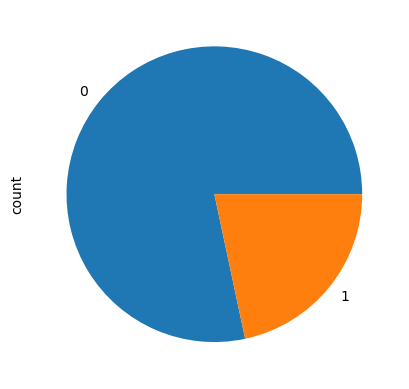

In [11]:
# 'loan_status' indicates if the loan was defaulted (1) or repayed on time (0). 
# This is what we would like to predict based on the dataset.
# Let's visualize it. 
df["loan_status"].value_counts().plot.pie()

# Resample

From the visualization above, we can see that substantially more number of loans were paid on time than defaulted. 

This imbalanced dataset is problematic for training a model. 

To handle imbalanced dataset, we can either under-sample the majority class or over-sample the minority class.

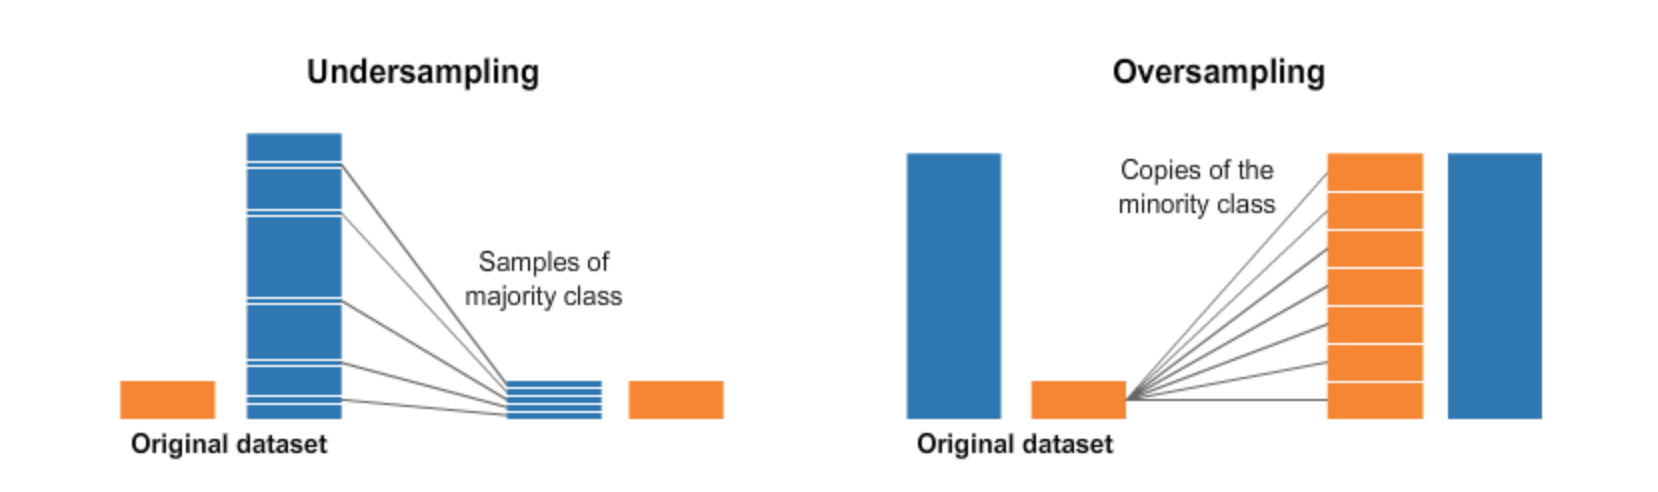

Random under-sampling:
loan_status
0    6203
1    6203
Name: count, dtype: int64


<Axes: title={'center': 'Count (target)'}, xlabel='loan_status'>

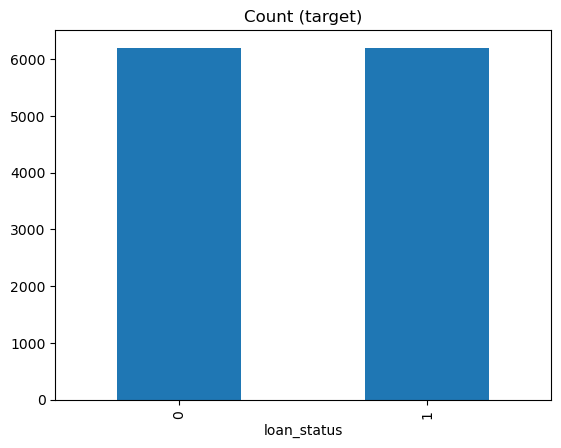

In [12]:
# Under sample
count_class_0, count_class_1 = df["loan_status"].value_counts()

# Divide by class
df_class_0 = df[df["loan_status"] == 0]
df_class_1 = df[df["loan_status"] == 1]

# df_under is the updated under-sampled data frame
df_class_0_under = df_class_0.sample(count_class_1)
df_under = pd.concat([df_class_0_under, df_class_1], axis=0)

print('Random under-sampling:')
print(df_under["loan_status"].value_counts())

df_under["loan_status"].value_counts().plot(kind='bar', title='Count (target)')

Random over-sampling:
loan_status
0    22435
1    22435
Name: count, dtype: int64


<Axes: title={'center': 'Count (target)'}, xlabel='loan_status'>

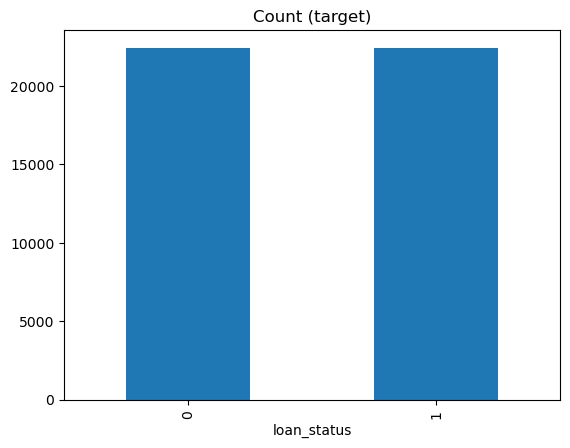

In [13]:
# Over sample 
# df_over is the updated over-sampled data frame
df_class_1_over = df_class_1.sample(count_class_0, replace=True)
df_over = pd.concat([df_class_0, df_class_1_over], axis=0)

print('Random over-sampling:')
print(df_over["loan_status"].value_counts())

df_over["loan_status"].value_counts().plot(kind='bar', title='Count (target)')

In [14]:
# In this assignment, we choose over-sample techniques.
# Now we split our dataset into input X and target value Y.

# Drop the labels from the data frame.
drop_df_over = df_over.drop(['loan_status'],axis=1)
X = drop_df_over.values

# Get the labels separately
y = df_over['loan_status'].values

# Now we split the data into training dataset and test dataset. 
# We use 80% of the data for Training and 20% for testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# Now we standardize features by removing the mean and scaling to unit variance.
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
X_train=sc.fit_transform(X_train)
X_test=sc.transform(X_test)

## Task 1: Data Visualisation - (10 marks)

Visualize some (at least two) other variables in the **over-sampled dataset**. 
Note that column names have changed after we convert categorical variable into dummy/indicator variables.

Text(0, 0.5, 'Frequency')

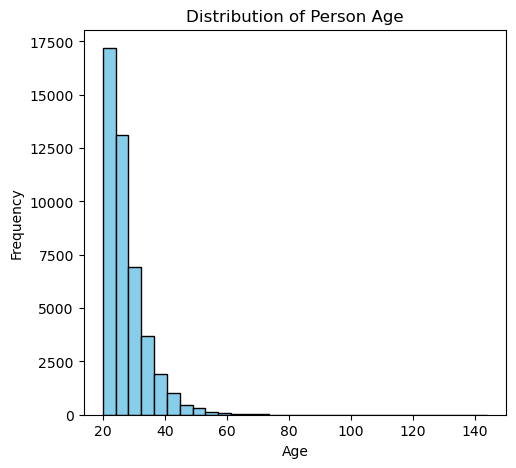

In [15]:
#Visualize the distribution of 'person_age'
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(df_over['person_age'], bins=30, color='skyblue', edgecolor='black')
plt.title('Distribution of Person Age')
plt.xlabel('Age')
plt.ylabel('Frequency')

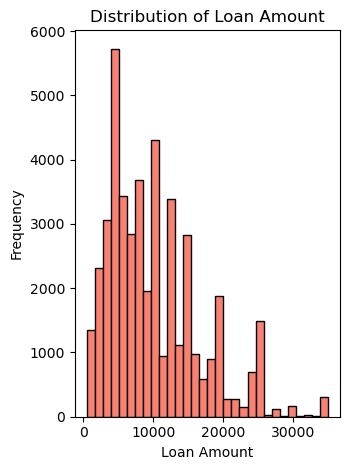

In [16]:
#Visualize the distribution of 'loan_amnt'
plt.subplot(1, 2, 2)
plt.hist(df_over['loan_amnt'], bins=30, color='salmon', edgecolor='black')
plt.title('Distribution of Loan Amount')
plt.xlabel('Loan Amount')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

## Task 2: Training a Traditional Machine Learning Model	- (25 Marks)

Train a machine learning model for predicting loan default with a machine learning algorithm discussed during the lectures **(Week 10 to Week 12)** (or any other appropriate algorithm not covered in the lectures). Which machine learning algorithm did you choose, and why? What is the accuracy of the model on the test set?

In [17]:
# Handle NaN values
imputer = SimpleImputer(strategy='mean')
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns=df.columns)

# Split the dataset into input X and target value Y
X = df_over.drop(['loan_status'], axis=1).values
y = df_over['loan_status'].values

# Split the data into training dataset and test dataset (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize features by removing the mean and scaling to unit variance
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# Initialize the KNN classifier
knn = KNeighborsClassifier(n_neighbors=5)

# Fit the model on the training data
knn.fit(X_train, y_train)

# Predict on the test data
y_pred = knn.predict(X_test)

# Calculate the accuracy
accuracy = accuracy_score(y_test, y_pred)

print('Accuracy:', accuracy)

Accuracy: 0.8589257856028527


### Reason for chosen model

## Task 3: Training a Neural Network-based Model - (25 Marks)

Train an artificial neural network (Multi-Layered Perceptron Classifier (MLP)) model for loan default prediction. What is the accuracy of the model on the test set?

In [18]:
# Drop the target variable 'loan_status' from the dataframe to create input features X
X = df_over.drop(['loan_status'], axis=1).values

# Get the target variable 'loan_status' as labels y
y = df_over['loan_status'].values

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Impute NaN values using the mean strategy
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train_standardized = scaler.fit_transform(X_train_imputed)
X_test_standardized = scaler.transform(X_test_imputed)

# Define the MLP classifier with a higher number of iterations
mlp = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=42)

# Train the MLP model on the standardized training set
mlp.fit(X_train_standardized, y_train)

# Predict on the standardized test set
y_pred_mlp = mlp.predict(X_test_standardized)

# Calculate the accuracy of the model
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
accuracy_mlp

0.8578114553153555

## Task 4: Model Explainability - (20 Marks)

SHAP importance is calculated on row level and can be used to understand what is important to a specific row. The values represent how a feature influences the prediction of a single row relative to the average outcome in the dataset.

It can be used to:

1. Understand which features most influence the predicted outcome.
2. Dive into a feature and understand how the different values of that feature affect the prediction.
3. Understand what is most influential on individual rows or subsets within the data.

In this task, you are expected to use SHAP (SHapley Additive exPlanations) to understand the model.

Get the SHAP importance for your traditional machine learning model (Task 2  above) using the **shap** library. 

**Make sure you provide the visualisation of shap values**

Based on the visualization, can you explain how each feature is contributing to the final prediction of loan default? Does your explaination align with business sense?

In [ ]:
# use SHAP (SHapley Additive exPlanations) to understand the model 
import shap

# Summarize the background data to K samples for SHAP computations
K = 50 
background = shap.sample(X_train_standardized, K)

# Use a small subset of the test data for SHAP explanations
X_test_sample = X_test_standardized[:50]

# Create the SHAP KernelExplainer
explainer = shap.KernelExplainer(knn.predict, background)

# Calculate SHAP values for the test set
shap_values = explainer.shap_values(X_test_sample)

# Get feature names
feature_names = credit_risk_data.drop(['loan_status'], axis=1).columns

# Visualize the feature importance
shap.summary_plot(shap_values, X_test_sample, plot_size=(10, 20), feature_names=feature_names)

  0%|          | 0/50 [00:00<?, ?it/s]

***Your analysis and dicussion will go here*** 

## Task 5: Social Implications - (20 Marks)

This task involves exploration of the social implications of algorithmic decision making in the context of credit risk prediction. In particular you will be looking at bias and discrimination. As a preparation, read the MIT Technology Review article *Bias isn’t the only problem with credit scores—and no, AI can’t help* available as: https://www.technologyreview.com/2021/06/17/1026519/racial-bias-noisy-data-credit-scores-mortgage-loans-fairness-machine-learning/
1. **(5 marks)** Summarize the above reading in about 200 words. 
2. **(5 marks)** Elaborate and explain in about 100 words the following sentence from this reading: "Incomplete data is troubling because detecting it will require researchers to have a fairly nuanced understanding of societal inequities".
3. **(10 marks)** In the context of the admittedly synthetic credit risk dataset you examined in this assignment, did you notice any possible issue of fairness and discrimination? Describe what steps you would recommend for alleviating such bias in the intended classification model.

### Summarisation of the reading
In the article, a major research was conducted by conomists Laura Blattner and Scott Nelson which reveals that credit score algorithms are less accurate for minorities due to incomplete data in their credit histories, not just bias. The reason is due to "noisy" data, which contributes in inaccurate predictions of creditworthiness, contributing to inequality. It was stated that even if algorithms was adjusted for bias alone, it would still be insufficient due to the inaccuracy stems from the variability in the data itself, not just from skewed algorithmic interpretations.

Another analysis by Blattner and Nelson which used data from 50 million anonymised US consumers, shows that errors in credit scores lead to incorrect loan decisions. It perpetuates a cycle where minorities and low-income individuals lack the opportunity to build better credit histories. It was found that fixing the issue would require more than just algorithmic tweaks; it demands systemic changes, such as encouraging lenders to take more risks on minority applicants and incorporating additional data sources like bank transactions.
While several smaller lenders are beginning to incoprate this practice,there needs tobe  a broader cultural shift within the lending industry. Policymakers and researchers must recognise the limitations of technical fixes and address the deeper, multifaceted issues of socio-economic disparities to create a more equitable credit system. (215 words)

### Elaboration & Explaination of sentence
Incomplete data in credit scoring systems is problematic because it requires researchers to possess a deep and nuanced understanding of societal inequities to identify and address the issue effectively.
This involves recognizing the historical and systemic factors that contribute to data gaps, such as economic disparities, access to financial services, and social biases. Researchers must also understand how these factors affect different communities to design fair and accurate predictive tools. Without this nuanced perspective, efforts to detect and correct incomplete data risk perpetuating existing inequalities, as they may fail to account for the complex socio-economic realities faced by disadvantaged groups.


### Notice of possible fairness & discirmination, steps recommended for alleviating such bias in the intended classification model